In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('images/lenna.png', 0)

In [5]:
img.shape

(512, 512)

##### Sobel Operator

In [6]:
help(cv2.Sobel)

Help on built-in function Sobel:

Sobel(...)
    Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
    .   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
    .   
    .   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
    .   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
    .   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
    .   or the second x- or y- derivatives.
    .   
    .   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
    .   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
    .   
    .   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
    .   
    .   for the x-derivative, or transposed for the y-derivative.
    . 

In [8]:
sobelx = cv2.Sobel(img, None, 1, 0, ksize=3)
sobely = cv2.Sobel(img, None, 0, 1, ksize=3)

In [9]:
sobelx.shape

(512, 512)

In [10]:
sobely.shape

(512, 512)

In [11]:
combined = cv2.add(sobelx, sobely)

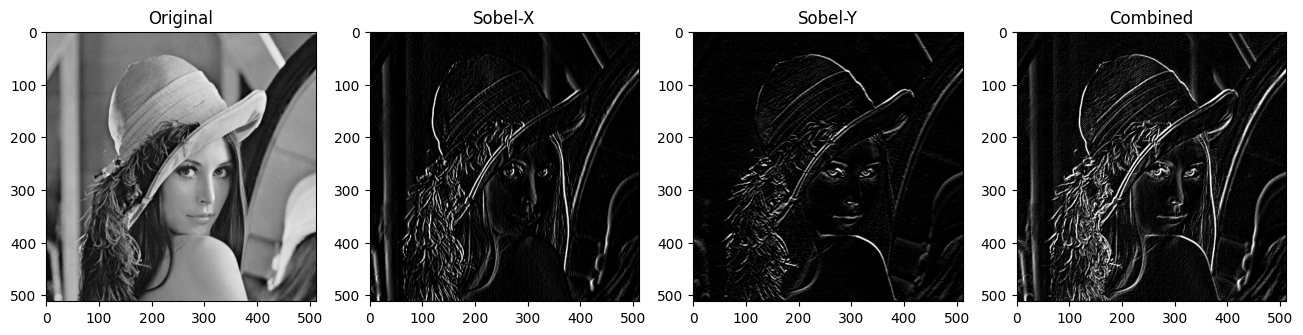

In [15]:
plt.figure(figsize=(16,9))
plt.subplot(1,4,1);   plt.title('Original');   plt.imshow(img, cmap='gray')
plt.subplot(1,4,2);   plt.title('Sobel-X');   plt.imshow(sobelx, cmap='gray')
plt.subplot(1,4,3);   plt.title('Sobel-Y');   plt.imshow(sobely, cmap='gray')
plt.subplot(1,4,4);   plt.title('Combined');   plt.imshow(combined, cmap='gray')

##### Scharr Operator

In [18]:
help(cv2.Scharr)

Help on built-in function Scharr:

Scharr(...)
    Scharr(src, ddepth, dx, dy[, dst[, scale[, delta[, borderType]]]]) -> dst
    .   @brief Calculates the first x- or y- image derivative using Scharr operator.
    .   
    .   The function computes the first x- or y- spatial image derivative using the Scharr operator. The
    .   call
    .   
    .   \f[\texttt{Scharr(src, dst, ddepth, dx, dy, scale, delta, borderType)}\f]
    .   
    .   is equivalent to
    .   
    .   \f[\texttt{Sobel(src, dst, ddepth, dx, dy, FILTER_SCHARR, scale, delta, borderType)} .\f]
    .   
    .   @param src input image.
    .   @param dst output image of the same size and the same number of channels as src.
    .   @param ddepth output image depth, see @ref filter_depths "combinations"
    .   @param dx order of the derivative x.
    .   @param dy order of the derivative y.
    .   @param scale optional scale factor for the computed derivative values; by default, no scaling is
    .   applied (see #getD

In [22]:
scharrx = cv2.Scharr(img, None, 1, 0)
scharry = cv2.Scharr(img, None, 0, 1)

In [33]:
combined_sch = cv2.add(scharrx, scharry)

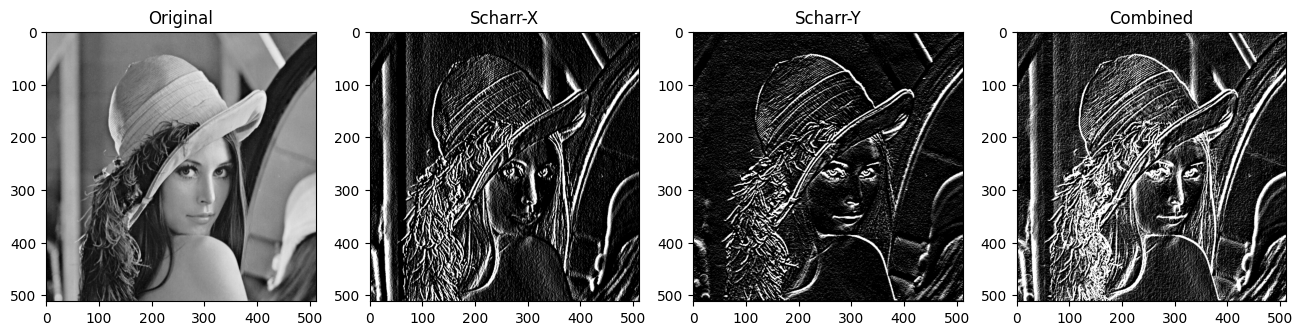

In [34]:
plt.figure(figsize=(16,9))
plt.subplot(1,4,1);   plt.title('Original');   plt.imshow(img, cmap='gray')
plt.subplot(1,4,2);   plt.title('Scharr-X');   plt.imshow(scharrx, cmap='gray')
plt.subplot(1,4,3);   plt.title('Scharr-Y');   plt.imshow(scharry, cmap='gray')
plt.subplot(1,4,4);   plt.title('Combined');   plt.imshow(combined_sch, cmap='gray')

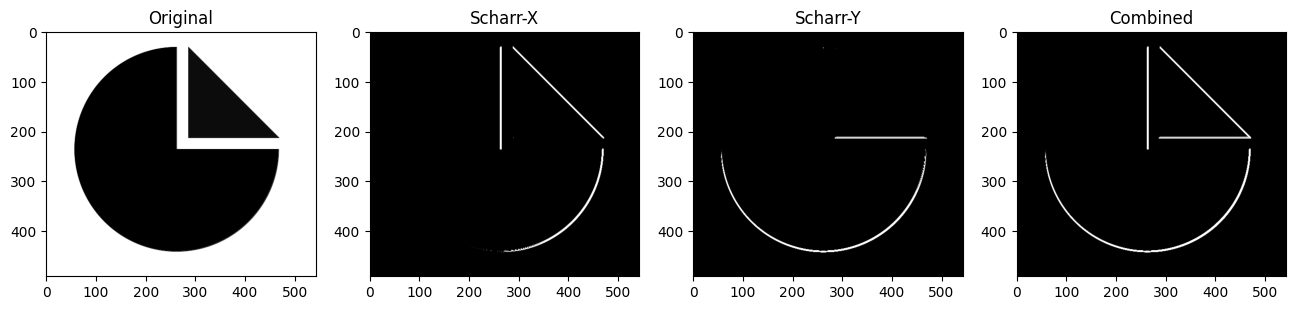

In [37]:
circle = cv2.imread('images/circle.png', 0)

scharrx = cv2.Scharr(circle, None, 1, 0)
scharry = cv2.Scharr(circle, None, 0, 1)
combined_sch = cv2.add(scharrx, scharry)

plt.figure(figsize=(16,9))
plt.subplot(1,4,1);   plt.title('Original');   plt.imshow(circle, cmap='gray')
plt.subplot(1,4,2);   plt.title('Scharr-X');   plt.imshow(scharrx, cmap='gray')
plt.subplot(1,4,3);   plt.title('Scharr-Y');   plt.imshow(scharry, cmap='gray')
plt.subplot(1,4,4);   plt.title('Combined');   plt.imshow(combined_sch, cmap='gray')

##### Canny Edge Detection

In [40]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
    .   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
    .   
    .   The function finds edges in the input image and marks them in the output map edges using the
    .   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
    .   largest value is used to find initial segments of strong edges. See
    .   <http://en.wikipedia.org/wiki/Canny_edge_detector>
    .   
    .   @param image 8-bit input image.
    .   @param edges output edge map; single channels 8-bit image, which has the same size as image .
    .   @param threshold1 first threshold for the hysteresis procedure.
    .   @param threshold2 second threshold for the hysteresis procedure.
    .   @param apertureSize aperture size for the Sobel operator.
    .   @param L2gradient a flag, indicating whether a more accurate \

In [44]:
img_can = cv2.Canny(img, 60, 255)

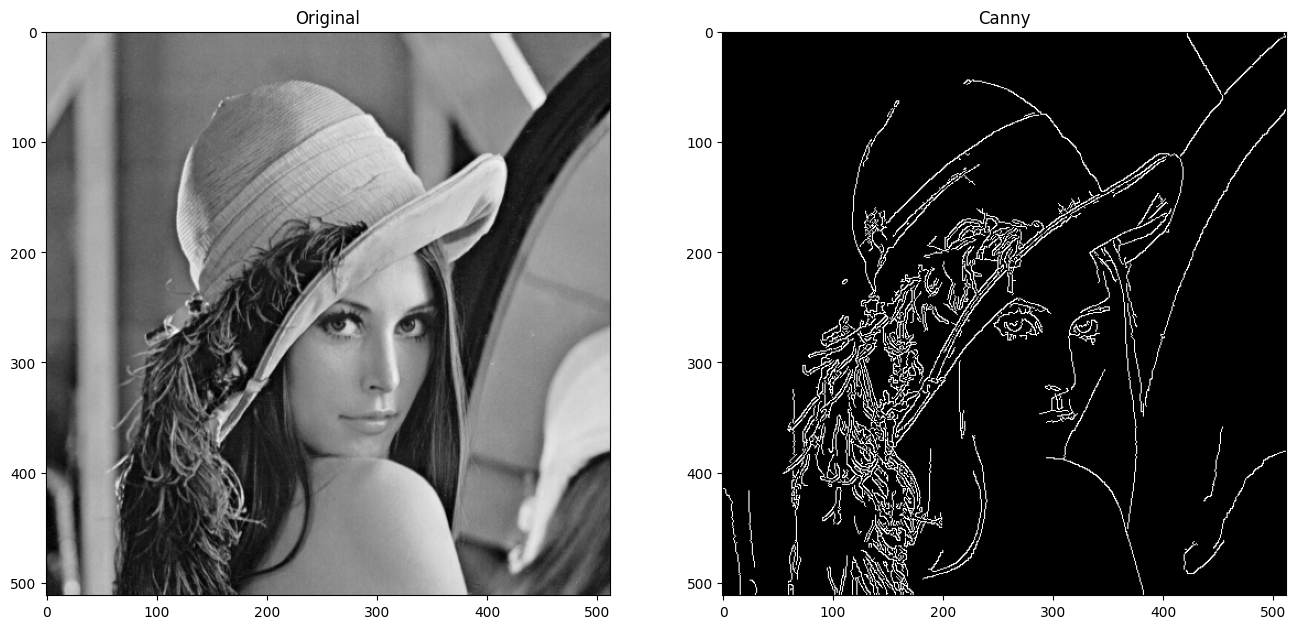

In [45]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1);   plt.title('Original');   plt.imshow(img, cmap='gray')
plt.subplot(1,2,2);   plt.title('Canny');   plt.imshow(img_can, cmap='gray')

In [46]:
img_can = cv2.Canny(circle, 60, 255)

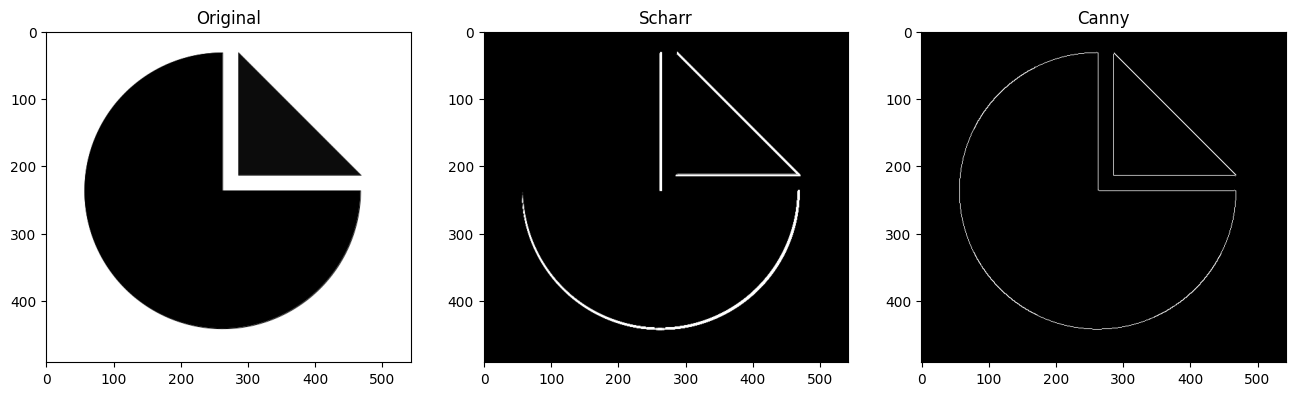

In [47]:
plt.figure(figsize=(16,9))
plt.subplot(1,3,1);   plt.title('Original');   plt.imshow(circle, cmap='gray')
plt.subplot(1,3,2);   plt.title('Scharr');   plt.imshow(combined_sch, cmap='gray')
plt.subplot(1,3,3);   plt.title('Canny');   plt.imshow(img_can, cmap='gray')

##### Contours Detection

In [49]:
# Load the image
img = cv2.imread('images/rgy.jpg')

# Convert to grayscale (often better for contour detection)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Creates a binary image where pixels above 127 are set to 255 (white), 
# and others to 0 (black).
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

# cv2.findContours finds contours in the binary image.
# cv2.RETR_TREE retrieves all contours and creates a hierarchy tree.
# cv2.CHAIN_APPROX_SIMPLE approximates contours to save memory.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_SIMPLE)

# -1 draws all contours.
# (0, 255, 0) is the color (green).
# 2 is the thickness of the lines.
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)  # Draw all contours in green

# Display results
cv2.imshow('Original Image', img)
cv2.imshow('Thresholded Image', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()